In [233]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import json
import pickle

In [72]:
def generate_customer_data(customer_id):
    age = random.randint(18, 65)
    gender = random.choice(['Male', 'Female'])
    
    if gender == 'Male':
        purchase_history = random.choice([
            ['T-shirt', 'Jeans', 'Sneakers'],  # Casual Wear + Footwear
            ['Kurta', 'Pajama', 'Jacket'],    # Ethnic Wear
            ['Joggers', 'T-shirt', 'Gym wear'],  # Activewear
            ['Casual Shoes', 'T-shirt', 'Jeans'],  # Casual Wear + Footwear
        ])
    else:
        purchase_history = random.choice([
            ['Dress', 'Tops', 'Jeans'],  # Western Wear
            ['Kurti', 'Leggings', 'Saree'],  # Ethnic Wear
            ['Nightwear', 'Tank Tops', 'Pajamas'],  # Loungewear
            ['Sunglasses', 'Handbag', 'Jeans'],  # Accessories + Western Wear
        ])
    
    if gender == 'Male':
        footwear_history = random.choice([
            ['Casual Shoes', 'Sneakers'],
            ['Flip-flops', 'Sandals'],
        ])
    else:
        footwear_history = random.choice([
            ['Sandals', 'Ballet Flats'],
            ['Slippers', 'Sneakers'],
        ])
    
    purchase_history += footwear_history

    accessories_history = random.choice([
        ['Handbag', 'Sunglasses'],
        ['Backpack', 'Jewelry'],
        ['Cap', 'Belt'],
        ['Earrings', 'Necklace'],
    ])
    purchase_history += accessories_history
    
    last_purchase_date = datetime.now() - timedelta(days=random.randint(0, 180))
    
    avg_purchase_amount = random.randint(1000, 7500)
    purchase_frequency = random.choice(['Monthly', 'Quarterly'])
    
    # Simulate response to previous campaign
    response_to_campaign = random.choice([0, 1])
    
    # Simulate customer segment
    segment = random.choice(['Premium', 'Budget', 'Occasional'])
    
    return {
        'CustomerID': customer_id,
        'Age': age,
        'Gender': gender,
        'PurchaseHistory': ', '.join(purchase_history),
        'LastPurchaseDate': last_purchase_date.strftime('%Y-%m-%d'),
        'AvgPurchaseAmount (INR)': avg_purchase_amount,
        'PurchaseFrequency': purchase_frequency,
        'ResponseToPreviousCampaign': response_to_campaign,
        'Segment': segment
    }

customers = [generate_customer_data(i) for i in range(1, 10001)]

df = pd.DataFrame(customers)

df.to_csv('zudio.csv', index=False)

In [73]:
df = pd.read_csv(r'zudio.csv')

In [74]:
df.head()

,CustomerID,Age,Gender,PurchaseHistory,LastPurchaseDate,AvgPurchaseAmount (INR),PurchaseFrequency,ResponseToPreviousCampaign,Segment
0,1,43,Male,"Kurta, Pajama, Jacket, Flip-flops, Sandals, Ha...",2024-12-14,6397,Monthly,0,Premium
1,2,20,Female,"Sunglasses, Handbag, Jeans, Sandals, Ballet Fl...",2024-12-14,5316,Monthly,1,Occasional
2,3,29,Male,"Joggers, T-shirt, Gym wear, Flip-flops, Sandal...",2025-01-26,2316,Monthly,0,Budget
3,4,56,Female,"Nightwear, Tank Tops, Pajamas, Sandals, Ballet...",2025-01-06,7321,Quarterly,0,Premium
4,5,48,Female,"Kurti, Leggings, Saree, Sandals, Ballet Flats,...",2024-12-14,5169,Quarterly,1,Budget


In [75]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'PurchaseHistory', 'LastPurchaseDate',
       'AvgPurchaseAmount (INR)', 'PurchaseFrequency',
       'ResponseToPreviousCampaign', 'Segment'],
      dtype='object')

In [76]:
df.shape

(10000, 9)

In [77]:
df.dtypes

CustomerID                     int64
Age                            int64
Gender                        object
PurchaseHistory               object
LastPurchaseDate              object
AvgPurchaseAmount (INR)        int64
PurchaseFrequency             object
ResponseToPreviousCampaign     int64
Segment                       object
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CustomerID                  10000 non-null  int64 
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   PurchaseHistory             10000 non-null  object
 4   LastPurchaseDate            10000 non-null  object
 5   AvgPurchaseAmount (INR)     10000 non-null  int64 
 6   PurchaseFrequency           10000 non-null  object
 7   ResponseToPreviousCampaign  10000 non-null  int64 
 8   Segment                     10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.3+ KB


In [79]:
df.isna().sum()

CustomerID                    0
Age                           0
Gender                        0
PurchaseHistory               0
LastPurchaseDate              0
AvgPurchaseAmount (INR)       0
PurchaseFrequency             0
ResponseToPreviousCampaign    0
Segment                       0
dtype: int64

# Data Analysis

In [81]:
# !pip install autoviz

In [82]:
# from autoviz.AutoViz_Class import AutoViz_Class

In [83]:
# AV = AutoViz_Class()

In [84]:
# %matplotlib inline
# filename = df

# dft = AV.AutoViz(
#     filename
# )

In [85]:
df['ResponseToPreviousCampaign'].value_counts()

ResponseToPreviousCampaign
0    5020
1    4980
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_7460\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

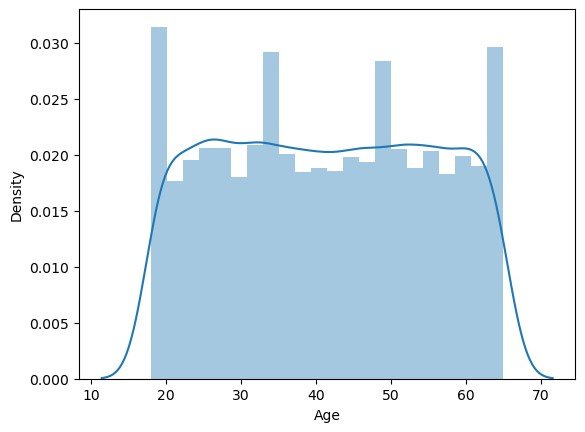

In [86]:
sns.distplot(df['Age'])

In [87]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'PurchaseHistory', 'LastPurchaseDate',
       'AvgPurchaseAmount (INR)', 'PurchaseFrequency',
       'ResponseToPreviousCampaign', 'Segment'],
      dtype='object')

<Axes: ylabel='Age'>

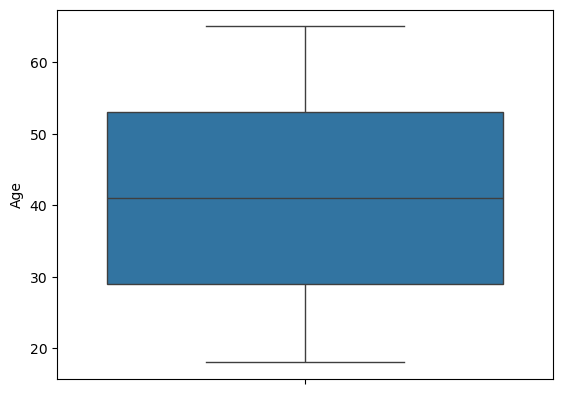

In [88]:
sns.boxplot(df['Age'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7460\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

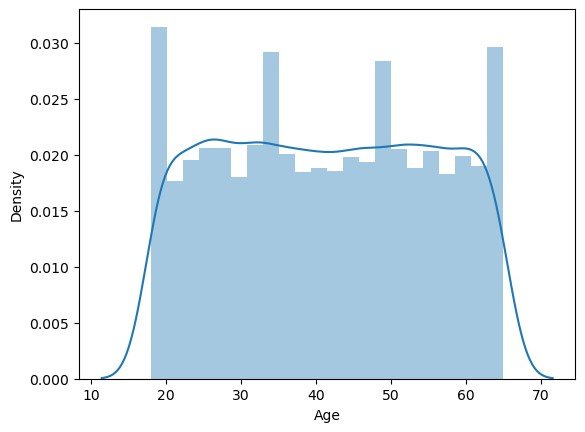

In [89]:
sns.distplot(df['Age'])

In [90]:
df['Gender'].value_counts()

Gender
Female    5040
Male      4960
Name: count, dtype: int64

In [91]:
df['Gender'].value_counts().to_dict()

{'Female': 5040, 'Male': 4960}

In [92]:
df.replace({'Female': 1, 'Male': 0}, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7460\396236061.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Female': 1, 'Male': 0}, inplace=True)


In [93]:
df.head(2)

,CustomerID,Age,Gender,PurchaseHistory,LastPurchaseDate,AvgPurchaseAmount (INR),PurchaseFrequency,ResponseToPreviousCampaign,Segment
0,1,43,0,"Kurta, Pajama, Jacket, Flip-flops, Sandals, Ha...",2024-12-14,6397,Monthly,0,Premium
1,2,20,1,"Sunglasses, Handbag, Jeans, Sandals, Ballet Fl...",2024-12-14,5316,Monthly,1,Occasional


In [94]:
df['PurchaseHistory'].value_counts()

PurchaseHistory
Kurti, Leggings, Saree, Slippers, Sneakers, Handbag, Sunglasses              179
Kurti, Leggings, Saree, Slippers, Sneakers, Earrings, Necklace               176
Kurta, Pajama, Jacket, Casual Shoes, Sneakers, Backpack, Jewelry             175
Kurti, Leggings, Saree, Sandals, Ballet Flats, Handbag, Sunglasses           175
Sunglasses, Handbag, Jeans, Sandals, Ballet Flats, Cap, Belt                 173
                                                                            ... 
Nightwear, Tank Tops, Pajamas, Sandals, Ballet Flats, Handbag, Sunglasses    142
Sunglasses, Handbag, Jeans, Slippers, Sneakers, Backpack, Jewelry            141
Casual Shoes, T-shirt, Jeans, Casual Shoes, Sneakers, Handbag, Sunglasses    140
Kurta, Pajama, Jacket, Flip-flops, Sandals, Backpack, Jewelry                137
Dress, Tops, Jeans, Slippers, Sneakers, Handbag, Sunglasses                  134
Name: count, Length: 64, dtype: int64

In [95]:
df['PurchaseHistory'].unique()

array(['Kurta, Pajama, Jacket, Flip-flops, Sandals, Handbag, Sunglasses',
       'Sunglasses, Handbag, Jeans, Sandals, Ballet Flats, Cap, Belt',
       'Joggers, T-shirt, Gym wear, Flip-flops, Sandals, Backpack, Jewelry',
       'Nightwear, Tank Tops, Pajamas, Sandals, Ballet Flats, Cap, Belt',
       'Kurti, Leggings, Saree, Sandals, Ballet Flats, Backpack, Jewelry',
       'Casual Shoes, T-shirt, Jeans, Casual Shoes, Sneakers, Backpack, Jewelry',
       'Joggers, T-shirt, Gym wear, Flip-flops, Sandals, Cap, Belt',
       'Dress, Tops, Jeans, Sandals, Ballet Flats, Handbag, Sunglasses',
       'Casual Shoes, T-shirt, Jeans, Flip-flops, Sandals, Cap, Belt',
       'Joggers, T-shirt, Gym wear, Casual Shoes, Sneakers, Backpack, Jewelry',
       'Casual Shoes, T-shirt, Jeans, Flip-flops, Sandals, Backpack, Jewelry',
       'T-shirt, Jeans, Sneakers, Casual Shoes, Sneakers, Earrings, Necklace',
       'Kurta, Pajama, Jacket, Flip-flops, Sandals, Backpack, Jewelry',
       'Kurta, Pajama, J

In [96]:
categories = {
    'Footwear': ['Casual Shoes', 'Sneakers', 'Flip-flops', 'Sandals', 'Ballet Flats', 'Slippers'],
    'Casual_Wear': ['T-shirt', 'Tank Tops', 'Tops', 'Jeans', 'Joggers', 'Shorts', 'Gym wear'],
    'Traditional_Wear' : ['Kurti', 'Saree', 'Pajama','Leggings'],
    'Accessories': ['Handbag', 'Sunglasses', 'Earrings', 'Necklace', 'Backpack', 'Cap', 'Belt'],
    'Gym Wear': ['Gym wear', 'Track Pants', 'Sports Bras']
}

In [97]:
def categorize_purchase_history(purchase_history, categories):
    category_values = {category: 0 for category in categories}
    items = [item.strip() for item in purchase_history.split(',')]
    
    for item in items:
        for category, items_in_category in categories.items():
            if item in items_in_category:
                category_values[category] = 1  
    
    return category_values

def add_category_columns(df, categories):
    category_columns = df['PurchaseHistory'].apply(lambda x: categorize_purchase_history(x, categories))
    category_df = pd.json_normalize(category_columns)
    df = pd.concat([df, category_df], axis=1)
    
    return df

df = add_category_columns(df, categories)

In [98]:
df.head(2)

,CustomerID,Age,Gender,PurchaseHistory,LastPurchaseDate,AvgPurchaseAmount (INR),PurchaseFrequency,ResponseToPreviousCampaign,Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear
0,1,43,0,"Kurta, Pajama, Jacket, Flip-flops, Sandals, Ha...",2024-12-14,6397,Monthly,0,Premium,1,0,1,1,0
1,2,20,1,"Sunglasses, Handbag, Jeans, Sandals, Ballet Fl...",2024-12-14,5316,Monthly,1,Occasional,1,1,0,1,0


In [99]:
df['LastPurchaseDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: LastPurchaseDate
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [100]:
df.head(2)

,CustomerID,Age,Gender,PurchaseHistory,LastPurchaseDate,AvgPurchaseAmount (INR),PurchaseFrequency,ResponseToPreviousCampaign,Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear
0,1,43,0,"Kurta, Pajama, Jacket, Flip-flops, Sandals, Ha...",2024-12-14,6397,Monthly,0,Premium,1,0,1,1,0
1,2,20,1,"Sunglasses, Handbag, Jeans, Sandals, Ballet Fl...",2024-12-14,5316,Monthly,1,Occasional,1,1,0,1,0


In [122]:
print(df['LastPurchaseDate'].info())

today_date = pd.to_datetime(datetime.datetime.now().date())

df['date_difference'] = (today_date - df['LastPurchaseDate']).dt.days

df[['LastPurchaseDate', 'date_difference']].head()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: LastPurchaseDate
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB
None


,LastPurchaseDate,date_difference
0,2024-12-14,100
1,2024-12-14,100
2,2025-01-26,57
3,2025-01-06,77
4,2024-12-14,100


In [124]:
df

,CustomerID,Age,Gender,PurchaseHistory,LastPurchaseDate,AvgPurchaseAmount (INR),PurchaseFrequency,ResponseToPreviousCampaign,Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference
0,1,43,0,"Kurta, Pajama, Jacket, Flip-flops, Sandals, Ha...",2024-12-14,6397,Monthly,0,Premium,1,0,1,1,0,100
1,2,20,1,"Sunglasses, Handbag, Jeans, Sandals, Ballet Fl...",2024-12-14,5316,Monthly,1,Occasional,1,1,0,1,0,100
2,3,29,0,"Joggers, T-shirt, Gym wear, Flip-flops, Sandal...",2025-01-26,2316,Monthly,0,Budget,1,1,0,1,1,57
3,4,56,1,"Nightwear, Tank Tops, Pajamas, Sandals, Ballet...",2025-01-06,7321,Quarterly,0,Premium,1,1,0,1,0,77
4,5,48,1,"Kurti, Leggings, Saree, Sandals, Ballet Flats,...",2024-12-14,5169,Quarterly,1,Budget,1,0,1,1,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,24,0,"T-shirt, Jeans, Sneakers, Casual Shoes, Sneake...",2024-12-10,4084,Quarterly,0,Premium,1,1,0,1,0,104
9996,9997,53,1,"Dress, Tops, Jeans, Sandals, Ballet Flats, Ear...",2025-02-23,7225,Monthly,0,Premium,1,1,0,1,0,29
9997,9998,23,1,"Sunglasses, Handbag, Jeans, Slippers, Sneakers...",2024-12-01,1562,Monthly,0,Budget,1,1,0,1,0,113
9998,9999,65,0,"Joggers, T-shirt, Gym wear, Casual Shoes, Snea...",2024-12-03,6788,Monthly,1,Budget,1,1,0,1,1,111


C:\Users\Dell\AppData\Local\Temp\ipykernel_7460\1547231129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AvgPurchaseAmount (INR)'])


<Axes: xlabel='AvgPurchaseAmount (INR)', ylabel='Density'>

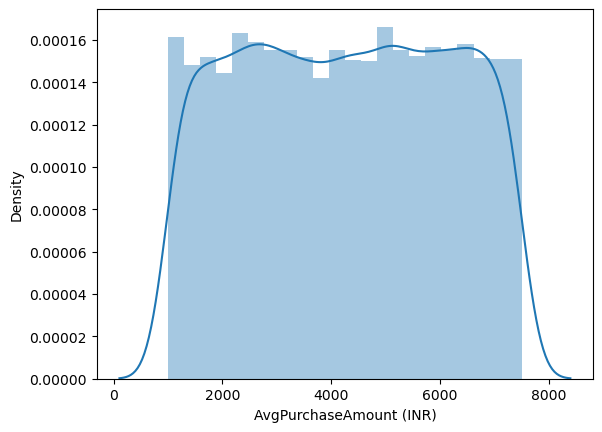

In [126]:
sns.distplot(df['AvgPurchaseAmount (INR)'])

In [128]:
df['PurchaseFrequency'].value_counts()

PurchaseFrequency
Monthly      5111
Quarterly    4889
Name: count, dtype: int64

In [130]:
df['PurchaseFrequency'].value_counts().to_dict()

{'Monthly': 5111, 'Quarterly': 4889}

In [132]:
df = pd.get_dummies(df, columns=['PurchaseFrequency'], dtype=int)

In [134]:
df.head(2)

,CustomerID,Age,Gender,PurchaseHistory,LastPurchaseDate,AvgPurchaseAmount (INR),ResponseToPreviousCampaign,Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference,PurchaseFrequency_Monthly,PurchaseFrequency_Quarterly
0,1,43,0,"Kurta, Pajama, Jacket, Flip-flops, Sandals, Ha...",2024-12-14,6397,0,Premium,1,0,1,1,0,100,1,0
1,2,20,1,"Sunglasses, Handbag, Jeans, Sandals, Ballet Fl...",2024-12-14,5316,1,Occasional,1,1,0,1,0,100,1,0


In [136]:
df['Segment'].value_counts()

Segment
Occasional    3356
Premium       3346
Budget        3298
Name: count, dtype: int64

In [138]:
df['Segment'].value_counts().to_dict()

{'Occasional': 3356, 'Premium': 3346, 'Budget': 3298}

In [140]:
df.replace({'Occasional': 0, 'Budget': 1, 'Premium': 2}, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7460\706371793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Occasional': 0, 'Budget': 1, 'Premium': 2}, inplace=True)


In [142]:
df.head(2)

,CustomerID,Age,Gender,PurchaseHistory,LastPurchaseDate,AvgPurchaseAmount (INR),ResponseToPreviousCampaign,Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference,PurchaseFrequency_Monthly,PurchaseFrequency_Quarterly
0,1,43,0,"Kurta, Pajama, Jacket, Flip-flops, Sandals, Ha...",2024-12-14,6397,0,2,1,0,1,1,0,100,1,0
1,2,20,1,"Sunglasses, Handbag, Jeans, Sandals, Ballet Fl...",2024-12-14,5316,1,0,1,1,0,1,0,100,1,0


In [146]:
df.drop(columns=['CustomerID', 'PurchaseHistory', 'LastPurchaseDate'], inplace=True)

In [148]:
df.head(2)

,Age,Gender,AvgPurchaseAmount (INR),ResponseToPreviousCampaign,Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference,PurchaseFrequency_Monthly,PurchaseFrequency_Quarterly
0,43,0,6397,0,2,1,0,1,1,0,100,1,0
1,20,1,5316,1,0,1,1,0,1,0,100,1,0


In [150]:
x = df.drop(['ResponseToPreviousCampaign'], axis=1)
y = df['ResponseToPreviousCampaign']

In [152]:
x

,Age,Gender,AvgPurchaseAmount (INR),Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference,PurchaseFrequency_Monthly,PurchaseFrequency_Quarterly
0,43,0,6397,2,1,0,1,1,0,100,1,0
1,20,1,5316,0,1,1,0,1,0,100,1,0
2,29,0,2316,1,1,1,0,1,1,57,1,0
3,56,1,7321,2,1,1,0,1,0,77,0,1
4,48,1,5169,1,1,0,1,1,0,100,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,0,4084,2,1,1,0,1,0,104,0,1
9996,53,1,7225,2,1,1,0,1,0,29,1,0
9997,23,1,1562,1,1,1,0,1,0,113,1,0
9998,65,0,6788,1,1,1,0,1,1,111,1,0


In [154]:
y

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: ResponseToPreviousCampaign, Length: 10000, dtype: int64

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2, stratify=y)

### Scaling

In [174]:
from sklearn.preprocessing import StandardScaler

In [176]:
std_scaler = StandardScaler()
array1 = std_scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(array1, columns=x_train.columns)
# print(x_train_scaled)

array2 = std_scaler.transform(x_test)
x_test_scaled = pd.DataFrame(array2, columns=x_test.columns)
x_test_scaled

,Age,Gender,AvgPurchaseAmount (INR),Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference,PurchaseFrequency_Monthly,PurchaseFrequency_Quarterly
0,1.479001,0.990050,0.626941,1.227636,0.0,0.596793,-0.596793,0.0,-0.371457,-1.216331,0.971652,-0.971652
1,0.402999,-1.010051,0.072868,1.227636,0.0,0.596793,-0.596793,0.0,-0.371457,-1.635265,-1.029175,1.029175
2,0.259532,0.990050,1.033439,-1.215117,0.0,0.596793,-0.596793,0.0,-0.371457,-1.235374,-1.029175,1.029175
3,0.833400,-1.010051,0.125611,-1.215117,0.0,0.596793,-0.596793,0.0,2.692104,1.697162,-1.029175,1.029175
4,-1.246871,-1.010051,1.388792,1.227636,0.0,0.596793,-0.596793,0.0,-0.371457,0.821210,-1.029175,1.029175
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.402999,0.990050,-0.880244,0.006260,0.0,-1.675622,1.675622,0.0,-0.371457,-0.511761,-1.029175,1.029175
1996,1.263800,-1.010051,-0.805125,-1.215117,0.0,0.596793,-0.596793,0.0,-0.371457,0.021428,0.971652,-0.971652
1997,-0.673003,0.990050,-0.402889,1.227636,0.0,0.596793,-0.596793,0.0,-0.371457,1.087804,-1.029175,1.029175
1998,-1.605539,0.990050,1.269986,1.227636,0.0,0.596793,-0.596793,0.0,-0.371457,-1.330586,0.971652,-0.971652


## 1. Logistic Regression

In [187]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train_scaled, y_train)

LogisticRegression()

In [189]:
# Training Data Evaluation:
y_pred_train = logistic_clf.predict(x_train_scaled)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[2210 1806]
 [2149 1835]]
Accuracy Score:  0.505625
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.55      0.53      4016
           1       0.50      0.46      0.48      3984

    accuracy                           0.51      8000
   macro avg       0.51      0.51      0.50      8000
weighted avg       0.51      0.51      0.50      8000



In [191]:
# Testing Data Evaluation:
y_pred_test = logistic_clf.predict(x_test_scaled)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[530 474]
 [538 458]]
Accuracy Score:  0.494
Classification Report:                precision    recall  f1-score   support

           0       0.50      0.53      0.51      1004
           1       0.49      0.46      0.48       996

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



## 2. KNN

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [209]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [211]:
# Training Data Evaluation:
y_pred_train = knn_model.predict(x_train_scaled)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[2752 1264]
 [1206 2778]]
Accuracy Score:  0.69125
Classification Report:                precision    recall  f1-score   support

           0       0.70      0.69      0.69      4016
           1       0.69      0.70      0.69      3984

    accuracy                           0.69      8000
   macro avg       0.69      0.69      0.69      8000
weighted avg       0.69      0.69      0.69      8000



In [213]:
# Testing Data Evaluation:
y_pred_test = knn_model.predict(x_test_scaled)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[506 498]
 [488 508]]
Accuracy Score:  0.507
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.50      0.51      1004
           1       0.50      0.51      0.51       996

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



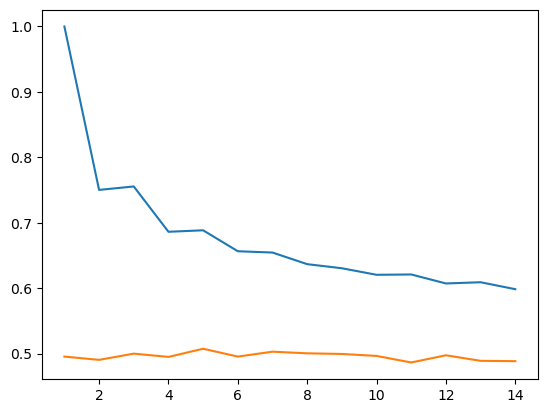

In [215]:
# Ploting for p=1:
k_values = range(1,15)
training_accuracy_list = []
testing_accuracy_list = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_model.fit(x_train_scaled, y_train)
    training_accuracy_list.append(knn_model.score(x_train_scaled, y_train))
    testing_accuracy_list.append(knn_model.score(x_test_scaled, y_test))

plt.plot(k_values, training_accuracy_list)
plt.plot(k_values, testing_accuracy_list)

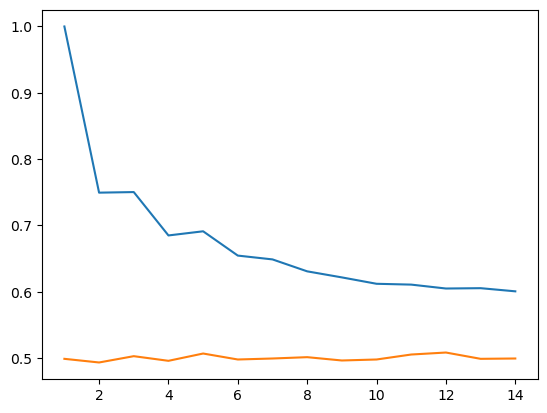

In [205]:
# Ploting for p=2:
k_values = range(1,15)
training_accuracy_list = []
testing_accuracy_list = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_model.fit(x_train_scaled, y_train)
    training_accuracy_list.append(knn_model.score(x_train_scaled, y_train))
    testing_accuracy_list.append(knn_model.score(x_test_scaled, y_test))

plt.plot(k_values, training_accuracy_list)
plt.plot(k_values, testing_accuracy_list)

In [216]:
knn_model = KNeighborsClassifier(p=12)
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier(p=12)

In [218]:
# Training Data Evaluation:
y_pred_train = knn_model.predict(x_train_scaled)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[2747 1269]
 [1225 2759]]
Accuracy Score:  0.68825
Classification Report:                precision    recall  f1-score   support

           0       0.69      0.68      0.69      4016
           1       0.68      0.69      0.69      3984

    accuracy                           0.69      8000
   macro avg       0.69      0.69      0.69      8000
weighted avg       0.69      0.69      0.69      8000



In [219]:
# Testing Data Evaluation:
y_pred_test = knn_model.predict(x_test_scaled)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[518 486]
 [509 487]]
Accuracy Score:  0.5025
Classification Report:                precision    recall  f1-score   support

           0       0.50      0.52      0.51      1004
           1       0.50      0.49      0.49       996

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



# 3. Decision Trees

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [227]:
dt_reg = DecisionTreeClassifier()
dt_reg.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [229]:
# Training Data Evaluation:
y_pred_train = dt_reg.predict(x_train_scaled)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[4016    0]
 [   0 3984]]
Accuracy Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4016
           1       1.00      1.00      1.00      3984

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [231]:
# Testing Data Evaluation:
y_pred_test = dt_reg.predict(x_test_scaled)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: ", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score: ", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report: ", clf_report)

Confusion Matrix:  [[515 489]
 [494 502]]
Accuracy Score:  0.5085
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.51      0.51      1004
           1       0.51      0.50      0.51       996

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [281]:
with open('knn_model5.pkl', 'wb') as f:
  pickle.dump(knn_model, f)

In [283]:
column_data = {

               'Gender' : {'Female': 1, 'Male': 0},
              'Segment' : {'Occasional': 0, 'Budget': 1, 'Premium': 2},
                
}


with open('column_data5.json', 'w') as f:
  json.dump(column_data, f)

In [273]:
df[(df['Age']==35) & (df['Gender']==0) & (df['AvgPurchaseAmount (INR)']==1974)]

,Age,Gender,AvgPurchaseAmount (INR),ResponseToPreviousCampaign,Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference,PurchaseFrequency_Monthly,PurchaseFrequency_Quarterly
885,35,0,1974,0,0,1,0,1,1,0,148,0,1


In [267]:
x_test[33:34]

,Age,Gender,AvgPurchaseAmount (INR),Segment,Footwear,Casual_Wear,Traditional_Wear,Accessories,Gym Wear,date_difference,PurchaseFrequency_Monthly,PurchaseFrequency_Quarterly
885,35,0,1974,0,1,0,1,1,0,148,0,1


In [269]:
knn_model.predict(x_test[33:34])

array([1], dtype=int64)

In [279]:
import os
os.getcwd()

'C:\\Users\\Dell'

In [289]:
df.columns

Index(['Age', 'Gender', 'AvgPurchaseAmount (INR)',
       'ResponseToPreviousCampaign', 'Segment', 'Footwear', 'Casual_Wear',
       'Traditional_Wear', 'Accessories', 'Gym Wear', 'date_difference',
       'PurchaseFrequency_Monthly', 'PurchaseFrequency_Quarterly'],
      dtype='object')

In [295]:
!pip install -r requirements.txt

In [301]:
import pandas as pd

print(pd.__version__)

2.2.2


In [305]:
import sklearn
print(sklearn.__version__)


1.4.2
